![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [55]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.sample(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
45842,220116137,2022-07-13,2022-07-12,1800,Central,BURGLARY FROM VEHICLE,44,M,H,NaN,Invest Cont,400 E TEMPLE ST
167941,231506103,2023-02-20,2023-02-11,1000,N Hollywood,BURGLARY FROM VEHICLE,25,M,W,NaN,Invest Cont,5600 FARMDALE AV
40850,222116681,2022-11-15,2022-11-15,1400,Topanga,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",70,M,B,NaN,Invest Cont,20700 SHERMAN WY
38885,221414819,2022-08-08,2022-08-06,1815,Pacific,BURGLARY,29,X,X,NaN,Invest Cont,300 SUNSET AV
176876,231005435,2023-02-06,2023-02-06,1300,West Valley,BURGLARY,59,M,O,NaN,Invest Cont,19100 SARITA PL


In [56]:

crimes["time_in_hr"] = crimes["TIME OCC"].str[:2].astype(int)
peak_crime_hour = crimes.groupby("time_in_hr")['Crm Cd Desc'].count().sort_values(ascending=False).head(1).index[0]


print(f"The peak crime hour of the day is: {peak_crime_hour}")

The peak crime hour of the day is: 12


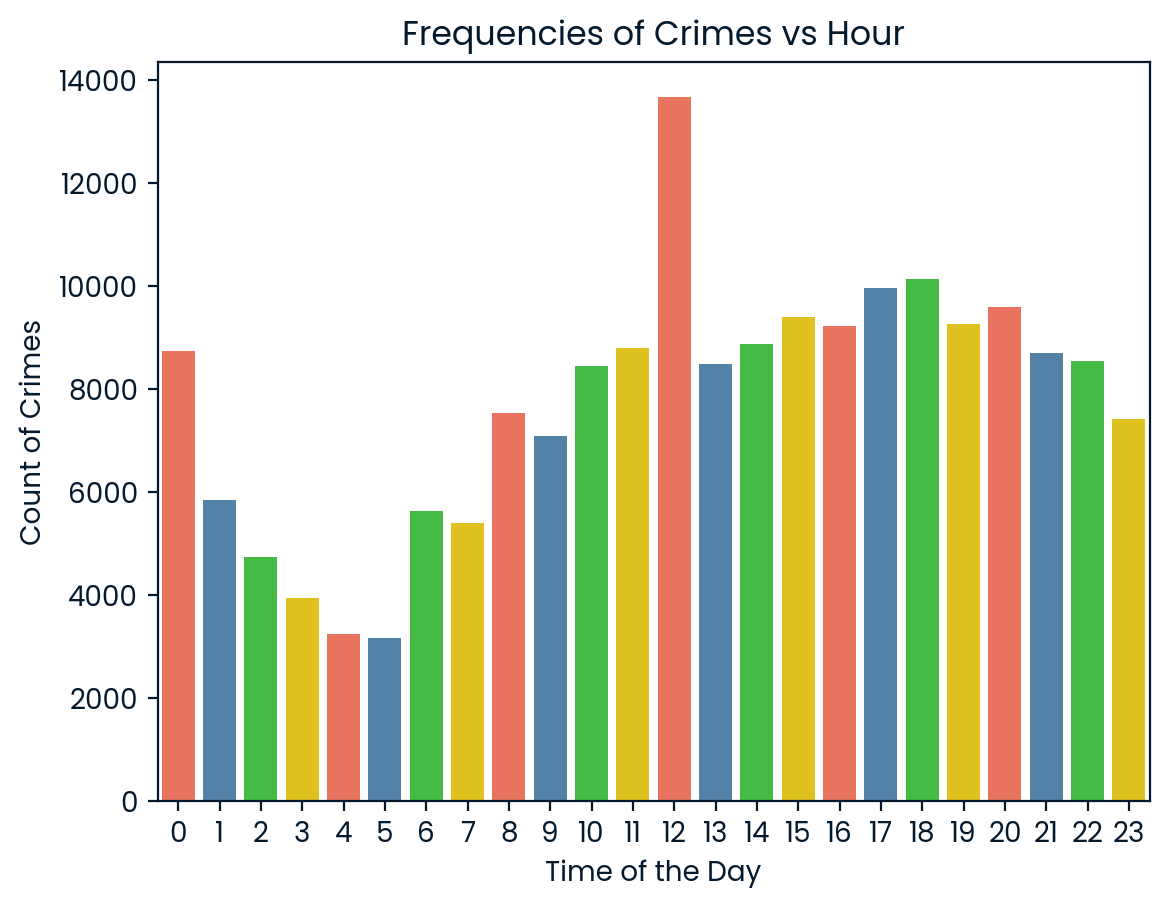

In [57]:
crime_distibution_by_hours = sns.countplot(x='time_in_hr', data=crimes, palette=['#FF6347', '#4682B4', '#32CD32', '#FFD700'])

# Set labels and title using the Axes object
crime_distibution_by_hours.set_xlabel("Time of the Day")
crime_distibution_by_hours.set_ylabel("Count of Crimes")
crime_distibution_by_hours.set_title("Frequencies of Crimes vs Hour")

# Show plot
plt.show()

In [58]:
# Filter for crimes committed bewteen 22UHR and 03:59

crimes_between_10pm_4am  = crimes[(crimes['time_in_hr'].astype(int) >= 22) | (crimes['time_in_hr'].astype(int) < 4)]

In [59]:
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 

area_counts = crimes_between_10pm_4am['AREA NAME'].value_counts().sort_values(ascending=False)
peak_night_crime_location = area_counts.head(1).index[0]
print(f"The peak crime area is: {peak_night_crime_location}")

The peak crime area is: Central


In [60]:
# Identify the number of crimes committed against victims of different age groups

age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64","65+"]
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=True)
victim_ages = crimes['Age Group'].value_counts().reindex(age_labels)
victim_ages

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Age Group, dtype: int64